# PCA (Principal Component Analysis): more samples

- __Scree plot__
  - A graph plotting eigenvalues in descending order from maximum to minimum.
  - It is desirable to use the __eigenvalues__ up to the point where the eigenvalues drop from a certain point to an older, smaller value and thereafter stabilize.
    - In practice, it is advisable to try ±2 or so, as this is a rough estimate.
- __Contribution Ratio__
  - Indicates the extent to which the principal components retain information from the original data.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
# Load Data
df_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None
)

df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Set each column name
# - (Ref) Data Set Information: https://archive.ics.uci.edu/ml/datasets/wine
df_wine.columns = [
    'class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline ',
]

display(df_wine.shape)
display(df_wine.head())

(178, 14)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


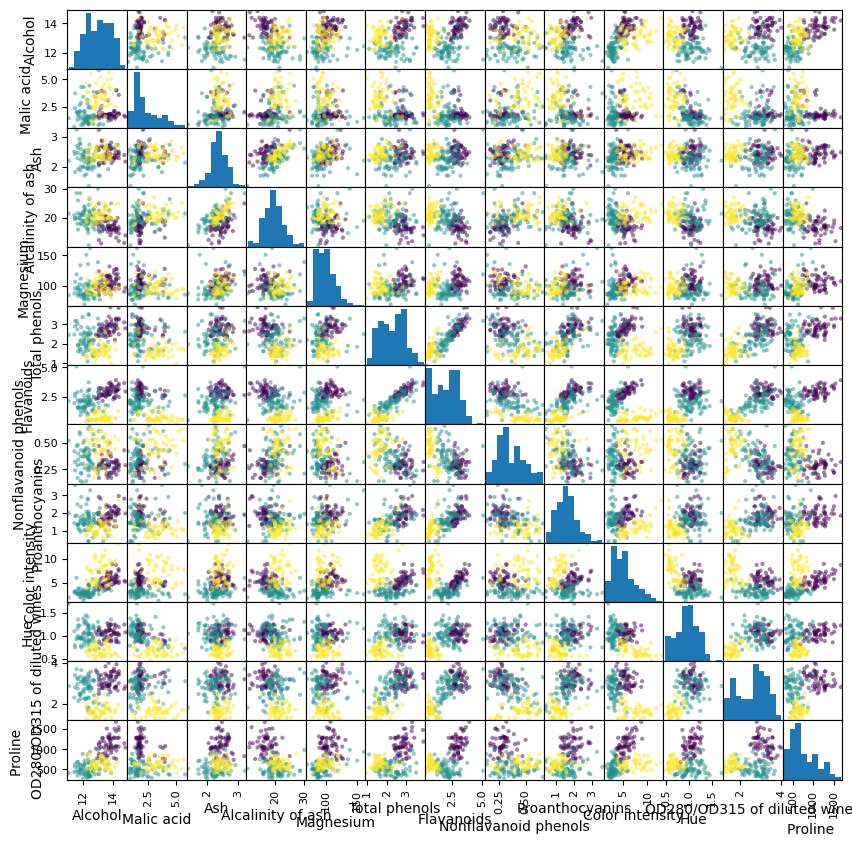

In [4]:
pd.plotting.scatter_matrix(
    df_wine.iloc[:, 1:],
    figsize=(10,10),
    c=list(df_wine.iloc[:, 0]),
    alpha=0.5
)
plt.show()

In [5]:
def x_norm():
    sc = preprocessing.StandardScaler()
    X = df_wine.iloc[:, 1:]
    return sc.fit_transform(X)


X_norm = x_norm()
X_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
# PCA
pca = PCA(random_state=0)

X_pc = pca.fit_transform(X_norm)
column_names = [
    f'PC{i + 1}' for i in range(len(X_pc[0]))
]

df_pca = pd.DataFrame(
    X_pc,
    columns=column_names
)

print(f'[Principal Components] {pca.n_components_}')
print(
    f'[Kept information] {np.sum(pca.explained_variance_ratio_)}'
)
display(df_pca)

[Principal Components] 13
[Kept information] 1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [7]:
def return_pca_indicator(pca_indicator, title: str):
    """Return PCA indicator
    """
    return pd.DataFrame(
        np.round(pca_indicator, 2),
        index=column_names,
        columns=[title]
    )

In [8]:
# Eigenvalues
return_pca_indicator(
    pca.explained_variance_,
    'Eigenvalues'
)

,Eigenvalues
PC1,4.73
PC2,2.51
PC3,1.45
PC4,0.92
PC5,0.86
PC6,0.65
PC7,0.55
PC8,0.35
PC9,0.29
PC10,0.25


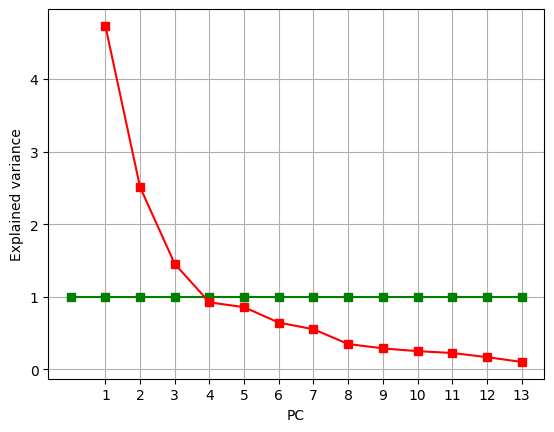

In [9]:
# Scree plot
plt.grid()
plt.plot(
    # Reference line with eigenvalue 1.0
    np.ones(14),
    's-',
    c='Green'
)
plt.plot(
    np.append(
        np.nan,
        pca.explained_variance_
    ),
    's-',
    c='Red'
)
plt.xticks(
    np.arange(1, 14, 1)
)
plt.xlabel('PC')
plt.ylabel('Explained variance')
plt.show()

In [10]:
# Dimensionality Reduction Number Search using Contribution Ratio
return_pca_indicator(
    pca.explained_variance_ratio_,
    'Contribution Ratio'
)

,Contribution Ratio
PC1,0.36
PC2,0.19
PC3,0.11
PC4,0.07
PC5,0.07
PC6,0.05
PC7,0.04
PC8,0.03
PC9,0.02
PC10,0.02


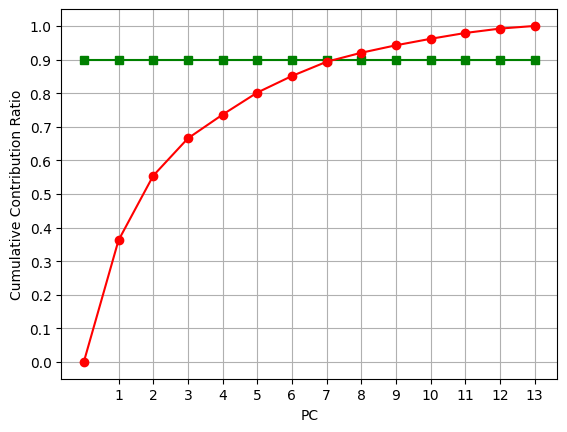

In [11]:
# Cumulative Contribution Ratio
plt.gca().get_xaxis().set_major_locator(
    ticker.MaxNLocator(integer=True)
)
plt.grid()
plt.plot(
    # The base value is used up to the point just before the cumulative contribution rate reaches 90% or more.
    np.full(14, 0.9),
    '-s',
    c='Green'
)
plt.plot(
    [0] + list(
        np.cumsum(pca.explained_variance_ratio_)
    ),
    '-o',
    c='Red'
)
plt.xticks(
    np.arange(1, 14, 1)
)
plt.yticks(
    np.arange(0, 1.1, 0.1)
)
plt.xlabel('PC')
plt.ylabel('Cumulative Contribution Ratio')
plt.show()

In [12]:
# Execute PCA specifying the cumulative contribution ratio.
X_norm_2 = x_norm()

pca_2 = PCA(
    # specify cumulative contribution ratio using n_components
    n_components=0.9,
    random_state=0
)

X_pc_2 = pca_2.fit_transform(X_norm_2)
X_pc_2

array([[ 3.31675081, -1.44346263, -0.16573904, ..., -0.22388013,
         0.59642655,  0.06513909],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.92712024,
         0.05377561,  1.02441595],
       [ 2.51674015, -1.0311513 ,  0.98281867, ...,  0.54927605,
         0.42420545, -0.34421613],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  0.27306792,
         0.67923541,  0.0470238 ],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  1.17878298,
         0.63397527,  0.39082877],
       [-3.20875816, -2.76891957,  1.01391366, ...,  0.29609218,
         0.00574126, -0.29291373]])

In [13]:
df_pca_2 = pd.DataFrame(
    X_pc_2,
    columns=[f'PC{i + 1}' for i in range(len(X_pc_2[0]))]
)

print(f'[Principal Components] {pca_2.n_components_}')
print(
    f'[Kept information] {round(np.sum(pca_2.explained_variance_ratio_), 2)}'
)
display(df_pca_2)

[Principal Components] 8
[Kept information] 0.92


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700
...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829
